In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
# from numpy import infinity
import mapclassify
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib .patches import Patch, Rectangle
from shapely.geometry import Point
from shapely.geometry import LineString

obce = gpd.read_file(r"../data/liptov_obce.csv", encoding = "windows-1250")
map2 = gpd.read_file(r"../data/geo/liptov.shp")
okresy = gpd.read_file(r"../data/geo/liptov_okresy.shp")
lipt_colors = pd.read_csv(r"../data/colors.csv", sep=";")
map2.drop(columns = ["DOW", "FACC", "IDN3", "NM3", "IDN2", "NM2", "NUTS1", "NUTS1_CODE", "NUTS2", "NUTS2_CODE", "NUTS3", "NUTS3_CODE", "LAU1", "LAU1_CODE", "LAU2", "LAU2_CODE", "VYMERA", "Shape_Area", "Shape_Leng"], inplace = True)
rieky = gpd.read_file(r"D:/Geography/univerzita_comenskeho/Geo Slovenska/DRUHA_CAST/rieky.shp")
vodne_nadrze = gpd.read_file(r"D:/Geography/univerzita_comenskeho/Geo Slovenska/Mapa2/Doplnkove_sluzby/Doplnkove_subory/vodne_nadrze_filtered.shp")
cesty = gpd.read_file(r"D:/Geography/univerzita_comenskeho/Geo Slovenska/DRUHA_CAST/Mapa3/cesty.shp")

map2["IDN4"] = map2["IDN4"].astype(str)
obce["kod"] = obce["kod"].astype(str)
obce["symbol"] = obce["kod"].apply(lambda code: "o" if (code != "510262") | (code != "510998") else "*")
unique_obce = map2["IDN4"].apply(str).tolist()

obce_gdf = gpd.GeoDataFrame(
    obce,
    geometry=[Point(xy) for xy in zip(obce["x"], obce["y"])],
    crs="EPSG:5514"
)


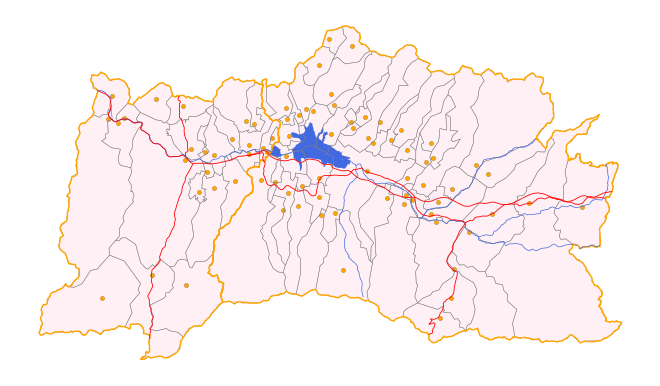

In [24]:
rieky_clip = gpd.clip(rieky, okresy)
vodne_nadrze_clip = gpd.clip(vodne_nadrze, okresy)
cesty_clip = gpd.clip(cesty, okresy)

plt.figure(figsize = (8.27, 11.69))
map2.plot(
    ax = plt.gca(),
    color = "lavenderblush",
    edgecolor = "none"
)
vodne_nadrze_clip.plot(
    ax = plt.gca(),
    color = "royalblue",
)
rieky_clip.plot(
    ax = plt.gca(),
    edgecolor = "royalblue",
    linewidth = 0.5
)
cesty_clip.plot(
    ax = plt.gca(),
    edgecolor = "red",
    linewidth = 0.6
)
obce_gdf.plot(
    ax = plt.gca(),
    color = "orange",
    markersize = 10.0,
    edgecolor = "black",
    linewidth = 0.1
)
map2.plot(
    ax = plt.gca(),
    color = "none",
    edgecolor = "gray",
    linewidth = 0.3
)
okresy.plot(
    ax = plt.gca(),
    color = "none",
    edgecolor = "orange",
    linewidth = 1.0
)

plt.axis(False)
plt.show()